In [ ]:
# data가 달라지면 딥러닝도 다시 실행해야 한다.
# 딥러닝 자체를 함수화하면 심플해진다.

In [ ]:
# Ananconda Navigator에서 party 설치
# 의사결정나무는 제일 오래된 머신러닝
# 표준화를 할 필요가 없다! 대신 정확도가 좀 떨어진다?

In [1]:
library(party)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


### Sampling

In [2]:
set.seed(1234)
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [9]:
# sampling 함수 createDataPartition
samp <- createDataPartition(iris$Species, p=0.7, list=F)
head(samp)

Resample1
1
2
3
4
5
7


In [10]:
# 학습용
data.tr <- iris[samp,]

# 테스트용
data.test <- iris[-samp,]

In [11]:
# 학습하기
model.ctree <- ctree(Species~.,data=data.tr)

In [12]:
# 문제 및 정답 만들기
x <- subset(data.test, select=-Species)
y <- data.test$Species

In [13]:
# 검증하기
pred <- predict(model.ctree,x)
pred

In [15]:
# 예측력과 정오표(오분류표)
mean(pred==y)
table(pred,y)

[1] 0.9333333

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         2
  virginica       0          1        13

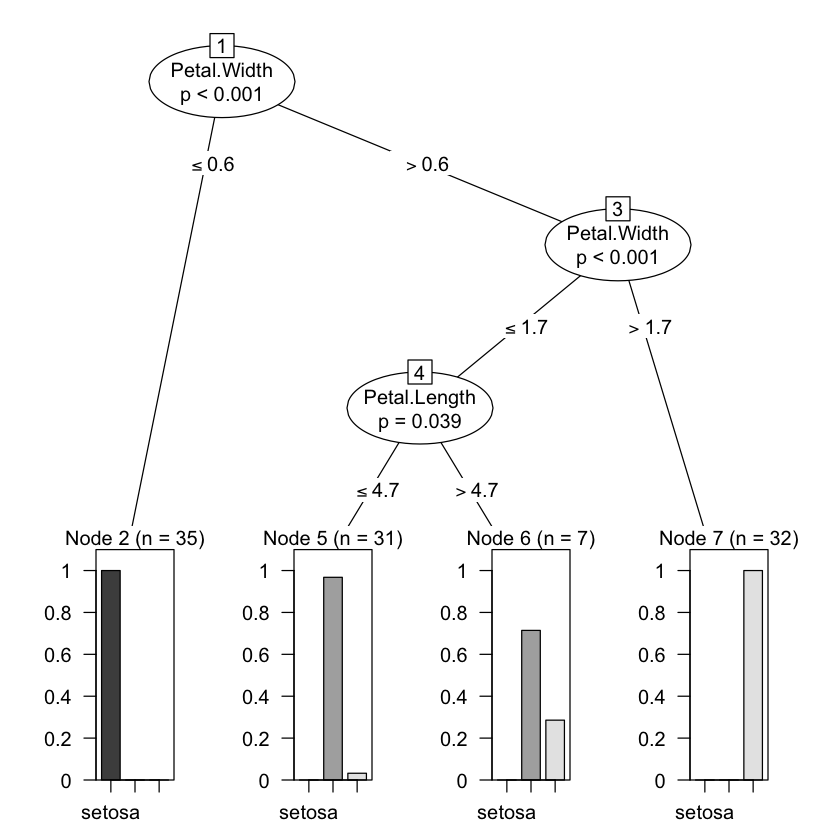

In [16]:
plot(model.ctree)
# 왜 의사결정 나무인가, 

In [17]:
# 표준화란 무엇인가
scale(iris$Sepal.Length)[1:5]

[1] -0.8976739 -1.1392005 -1.3807271 -1.5014904 -1.0184372

In [19]:
# 표준화 = (X - 평균()) / 표준편차(), ()에 학습된 내용을 넣는다.
head((iris$Sepal.Length - mean(iris$Sepal.Length)) / sd(iris$Sepal.Length))

[1] -0.8976739 -1.1392005 -1.3807271 -1.5014904 -1.0184372 -0.5353840

In [ ]:
# 은닉층 : 입력층의 수보다 적게 만든다, 일종의 수렴하는 과정이므로 